# 4회차 실습 과제

## 문제 항목

| 문제     | 주제                         | 핵심 개념                                                         |
|----------|------------------------------|-------------------------------------------------------------------|
| 문제 1   | 편의점 일일 매출 분석        | 정규성 검정, 단일표본 검정 (t vs Wilcoxon), 효과크기, 모수 vs 비모수 비교 |
| 문제 2   | 두 생산라인 제품 무게 비교   | 등분산 검정, 독립표본 검정 (Welch's t vs Mann-Whitney U), 이상치 영향   |
| 문제 3   | 요일별 고객 방문 패턴 분석   | 카이제곱 적합도 검정, Cohen's w, 표준화 잔차, Cochran's rule, Monte Carlo |
| 문제 4   | 연령대별 운동 선호도 조사    | 카이제곱 독립성 검정, Cramér's V, 조정된 잔차, Fisher 정확검정 (2×2)    |

---

## 핵심 공식 정리

### 가설검정 프로세스

| 단계 | 내용                                   | 비고                                          |
|------|----------------------------------------|-----------------------------------------------|
| 1    | **분석 목표** 파악                     | 무엇을 검정하려 하는지 명확히 정의합니다       |
| 2    | **가설 설정** (H₀, H₁)                | 귀무가설과 대립가설을 수식으로 표현합니다       |
| 3    | **검정 방향** 결정                     | 양측/단측 검정을 선택하고 근거를 제시합니다     |
| 4    | **가정 검정**                          | 정규성, 등분산, 기대빈도 조건 등을 확인합니다   |
| 5    | **검정 수행**                          | 가정 결과에 따라 적절한 검정을 선택합니다       |
| 6    | **효과크기** 산출                      | 통계적 유의성과 별개로 실질적 의미를 판단합니다 |
| 7    | **결론** 도출                          | p-value와 효과크기를 종합하여 해석합니다        |

> 카이제곱 검정(적합도, 독립성)은 검정 자체가 "차이 존재 여부"를 판정하므로
> 양측/단측 개념이 적용되지 않습니다 (3단계 생략).

### 양측검정 vs 단측검정

| 구분          | 양측검정 (two-sided)           | 단측검정 (one-sided)              |
|---------------|--------------------------------|-----------------------------------|
| H₁ 형태      | μ ≠ μ₀                        | μ > μ₀ 또는 μ < μ₀              |
| 사용 시기     | 방향을 사전에 특정할 수 없을 때 | 이론적·실무적 근거로 방향이 명확할 때 |
| 검정력        | 상대적으로 낮음                | 같은 α에서 더 높은 검정력         |
| 주의          | 가장 보수적이고 안전한 선택     | 사전 근거 없이 사용하면 부적절     |

### 정규성 검정

| 방법            | 판정 기준                          | 비고                              |
|-----------------|------------------------------------|-----------------------------------|
| Shapiro-Wilk    | p > 0.05 → 정규성 기각 못 함      | 소표본에 적합, 대표본에서 과민    |
| Q-Q Plot        | 점들이 대각선 위 → 정규            | 시각적 판단, Shapiro-Wilk와 함께  |

### 검정 선택 가이드 (연속형)

| 상황            | 정규성 충족                     | 정규성 위반                   |
|-----------------|---------------------------------|-------------------------------|
| 단일·대응표본   | 단일/대응표본 t-검정            | Wilcoxon signed-rank          |
| 독립 2집단      | Student's t (등분산) / Welch's t (이분산) | Mann-Whitney U        |

### 비모수 검정 효과크기

| 효과크기         | 적용 검정               | 해석 기준 (small / medium / large) |
|------------------|-------------------------|------------------------------------|
| rank-biserial r  | Wilcoxon, Mann-Whitney  | 0.1 / 0.3 / 0.5                   |

### 카이제곱 검정

| 검정           | 공식                                                          | 자유도                   |
|----------------|---------------------------------------------------------------|--------------------------|
| 적합도 검정    | $\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$                   | $df = k - 1$            |
| 독립성 검정    | $\chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}$          | $df = (r-1)(c-1)$       |
| 기대빈도       | $E_{ij} = \frac{R_i \times C_j}{N}$                          | —                        |

### 효과크기 (카이제곱)

| 효과크기     | 적용 검정      | 공식                                        | 해석 기준 (small / medium / large) |
|--------------|----------------|---------------------------------------------|------------------------------------|
| Cohen's w    | 적합도         | $\sqrt{\chi^2 / N}$                        | 0.1 / 0.3 / 0.5                   |
| Cramér's V   | 독립성         | $\sqrt{\chi^2 / (N \cdot \min(r-1, c-1))}$ | df*에 따라 다름                    |
| φ (Phi)      | 독립성 (2×2)   | $\sqrt{\chi^2 / N}$                        | 0.1 / 0.3 / 0.5                   |

### Cochran's rule (기대빈도 조건)

| 조건 | 기준                                     | 위반 시 대안                              |
|------|------------------------------------------|-------------------------------------------|
| (1)  | 기대빈도 < 5인 셀이 전체의 20% 이하     | 적합도 → Monte Carlo / 범주 병합          |
| (2)  | 기대빈도 < 1인 셀이 0개                  | 독립성(2×2) → Fisher / 독립성(R×C) → FFH  |

### 판정 규칙

| p-value 결과  | 판정             | 해석                                          |
|---------------|------------------|-----------------------------------------------|
| p ≤ α         | H₀ **기각**      | "이 결과가 우연이라고 보기 어렵습니다" → 유의   |
| p > α         | H₀ **기각 실패** | "증거 부족, 판단 보류" (H₀가 참은 아닙니다!)    |

---

In [1]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import platform

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

print("=" * 60)
print("4회차 실습 과제: 비모수 검정, 카이제곱 검정")
print("=" * 60)


4회차 실습 과제: 비모수 검정, 카이제곱 검정


---

## 문제 1: 편의점 일일 매출 분석

한 편의점 본사는 특정 지점의 일일 매출이 전국 평균 **250만원**과 다른지 확인하려 합니다.

20일간의 매출 데이터를 수집했는데, 매출 분포가 정규분포를 따르는지 먼저 확인해야 합니다.

**분석 목표**: 이 편의점의 일일 매출이 전국 평균(250만원)과 통계적으로 유의한 차이가 있는지 검정합니다.

**주어진 데이터:**

In [2]:
print("\n[문제 1] 편의점 일일 매출 분석")
print("=" * 50)

np.random.seed(501)
daily_sales = np.round(np.random.lognormal(mean=5.5, sigma=0.3, size=20), 1)
mu0_sales = 250.0  # 전국 평균 매출 (만원)

print(f"일일 매출 데이터 (n = {len(daily_sales)}일, 단위: 만원):")
print(daily_sales)
print(f"\n표본 평균: {np.mean(daily_sales):.1f}만원")
print(f"표본 중앙값: {np.median(daily_sales):.1f}만원")
print(f"전국 평균(μ₀): {mu0_sales}만원")



[문제 1] 편의점 일일 매출 분석
일일 매출 데이터 (n = 20일, 단위: 만원):
[249.5 157.8 304.8 352.4 137.4 213.2 298.3 209.3 363.6 363.4 194.7 418.4
 207.9 250.8 206.3 372.8 367.1 355.8 214.9 207.6]

표본 평균: 272.3만원
표본 중앙값: 250.2만원
전국 평균(μ₀): 250.0만원


### 문제 1-1: 정규성 검정 (가정 검정)

**(a)** 수치적 정규성 검정(Shapiro-Wilk)을 수행하세요.

**(b)** Q-Q Plot을 그려 시각적으로 분포를 확인하세요.

**(c)** 두 결과를 종합하여 "정규분포를 따르는가?"를 판단하고,

Q-Q Plot에서 관찰되는 패턴이 어떤 분포 특성을 나타내는지 설명하세요.


[문제 1-1] 정규성 검정
----------------------------------------
Shapiro p = 0.0720445012268248


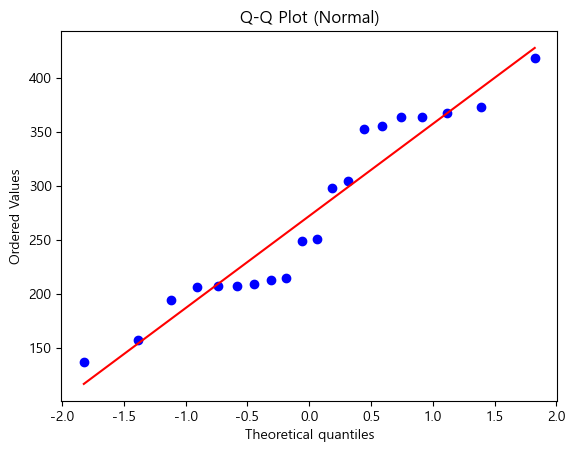

In [3]:
print("\n[문제 1-1] 정규성 검정")
print("-" * 40)

# 1) Shapiro-Wilk test
stat, p = stats.shapiro(daily_sales)   # x: sample OR residuals OR paired differences
print("Shapiro p =", p)

# 2) QQ plot (visual normality check)
from scipy import stats
stats.probplot(daily_sales, dist="norm", plot=plt)
plt.title("Q-Q Plot (Normal)")
plt.show()


In [ ]:
# TODO (c): 종합 판단
print(f"\n(c) 종합 판단:")
print(f"    Shapiro-Wilk: {p:.2f}")
print(f"    결론: Shapiro는 정규성이라는 사실을 기각하지 못한다. 다만, QQ plot에서는 살짝 정규성을 벗어난 모습이 보이긴한다.")


### 문제 1-2: 가설 설정과 검정 수행

**(a)** 분석 목표에 맞는 **귀무가설(H₀)**과 **대립가설(H₁)**을 설정하세요.

**(b)** **양측검정** 또는 **단측검정** 중 어떤 것이 적절한지 결정하고, 그 근거를 설명하세요.

**(c)** 정규성 검정 결과를 바탕으로, 이 데이터에 적절한 검정 방법을 선택하고 그 이유를 설명하세요.

**(d)** 선택한 검정을 수행하세요 (α = 0.05).

**(e)** 효과크기를 계산하세요.

> 모수 검정인지 비모수 검정인지에 따라 적절한 효과크기 지표가 다릅니다.
> 해석 기준과 함께 보고하세요.

**(f)** p-value와 효과크기를 종합하여 최종 결론을 내리세요.

In [15]:
print("\n[문제 1-2] 가설 설정과 검정 수행")
print("-" * 40)

# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: μ = {mu0_sales} (이 지점의 평균 매출은 전국 평균과 같다)")
print(f"    H₁: μ ≠ {mu0_sales} (이 지점의 평균 매출은 전국 평균과 다르다)")

# TODO (b): 양측/단측 결정
print(f"\n(b) 검정 방향:")
print(f"    선택: 양측검정")
print(f"    근거: '다른지 확인'이므로 증가/감소 방향을 특정하지 않음")

# TODO (c): 검정 방법 선택
print(f"\n(c) 검정 방법 선택:")
print(f"    정규성 결과: p = {p:.3f} > 0.05")
print(f"    선택: One-sample t-test")
print(f"    이유: 정규성 가정을 기각할 수 없고, 모표준편차를 모름")

alpha = 0.05 
alternative = "two-sided"  

mu0 = mu0_sales

t_stat, p_value = stats.ttest_1samp(daily_sales, popmean=mu0, alternative=alternative)

xbar = float(np.mean(daily_sales))
sd = float(np.std(daily_sales, ddof=1))
d = (xbar - mu0) / sd if sd > 0 else np.nan

print("[일표본 t-검정]")
print(f"  H0: mean = {mu0} | alternative = {alternative}")
print(f"  mean = {xbar:.4f}, t = {t_stat:.4f}, p = {p_value:.4g}, alpha = {alpha}")
print(f"  효과크기(Cohen's d) = {d:.4f}  (|d|: 0.2=작음, 0.5=중간, 0.8=큼; 분야에 따라 달라질 수 있음)")

if p_value < alpha:
    print("  → H0 기각: 평균이 mu0와 다르다는 증거가 있습니다.")
else:
    print("  → H0 기각 실패: 평균 차이에 대한 증거가 부족합니다.")

# (mean - mu0) 신뢰구간
n = len(daily_sales); df = n - 1
se = stats.sem(daily_sales)
if alternative == "two-sided":
    tcrit = stats.t.ppf(1 - alpha/2, df)
    ci = ((xbar - mu0) - tcrit*se, (xbar - mu0) + tcrit*se)
elif alternative == "greater":
    tcrit = stats.t.ppf(1 - alpha, df)
    ci = ((xbar - mu0) - tcrit*se, np.inf)
else:  # "less"
    tcrit = stats.t.ppf(1 - alpha, df)
    ci = (-np.inf, (xbar - mu0) + tcrit*se)
print(f"  {int((1-alpha)*100)}% CI for (mean - mu0) = {ci}")

print("이 편의점의 평균 매출은 전국 평균과 통계적으로 유의한 차이가 있다고 보기 어렵다.")


[문제 1-2] 가설 설정과 검정 수행
----------------------------------------
(a) 가설 설정:
    H₀: μ = 250.0 (이 지점의 평균 매출은 전국 평균과 같다)
    H₁: μ ≠ 250.0 (이 지점의 평균 매출은 전국 평균과 다르다)

(b) 검정 방향:
    선택: 양측검정
    근거: '다른지 확인'이므로 증가/감소 방향을 특정하지 않음

(c) 검정 방법 선택:
    정규성 결과: p = 0.001 > 0.05
    선택: One-sample t-test
    이유: 정규성 가정을 기각할 수 없고, 모표준편차를 모름
[일표본 t-검정]
  H0: mean = 250.0 | alternative = two-sided
  mean = 272.3000, t = 1.1878, p = 0.2496, alpha = 0.05
  효과크기(Cohen's d) = 0.2656  (|d|: 0.2=작음, 0.5=중간, 0.8=큼; 분야에 따라 달라질 수 있음)
  → H0 기각 실패: 평균 차이에 대한 증거가 부족합니다.
  95% CI for (mean - mu0) = (np.float64(-16.9959109135269), np.float64(61.595910913527035))
이 편의점의 평균 매출은 전국 평균과 통계적으로 유의한 차이가 있다고 보기 어렵다.


### 문제 1-3: 모수 vs 비모수 비교

같은 데이터에 대해 **모수 검정과 비모수 검정을 모두** 수행하고, 결과를 비교해 보세요.

**(a)** 모수 검정(단일표본 t-검정)의 결과를 구하세요.

**(b)** 비모수 검정(Wilcoxon signed-rank)의 결과를 구하세요.

**(c)** 두 검정의 결론이 같은가요, 다른가요?

만약 다르다면, 이 데이터의 어떤 특성 때문에 차이가 발생하는지 설명하세요.

In [9]:
print("\n[문제 1-3] 모수 vs 비모수 비교")
print("-" * 40)

# TODO (a): 모수 검정
t_stat_1, p_value_1 = stats.ttest_1samp(daily_sales, popmean=mu0, alternative=alternative)

print(f"(a) 단일표본 t-검정: t = {t_stat_1}, p = {p_value_1}")

# TODO (b): 비모수 검정
stat_2, p_value_2 = stats.wilcoxon(daily_sales - mu0, alternative=alternative)

print(f"\n(b) Wilcoxon signed-rank: W = {stat_2}, p = {p_value_2}")

# TODO (c): 비교 해석
print(f"\n(c) 결과 비교 및 해석:")
print(f"    모수 검정 판정: 귀무가설 기각 못함 (p = {p_value_1:.3f})")
print(f"    비모수 검정 판정: 귀무가설 기각 못함 (p = {p_value_2:.3f})")
print(f"   t-검정은 정규성/평균을 가정하고 원자료 값을 사용하며, Wilcoxon은 순위 기반으로 중앙값 차이를 검정해 이상치에 덜 민감함.")




[문제 1-3] 모수 vs 비모수 비교
----------------------------------------
(a) 단일표본 t-검정: t = 1.1877682773664504, p = 0.24956150037570585

(b) Wilcoxon signed-rank: W = 72.0, p = 0.2305126190185547

(c) 결과 비교 및 해석:
    모수 검정 판정: 귀무가설 기각 못함 (p = 0.250)
    비모수 검정 판정: 귀무가설 기각 못함 (p = 0.231)
   t-검정은 정규성/평균을 가정하고 원자료 값을 사용하며, Wilcoxon은 순위 기반으로 중앙값 차이를 검정해 이상치에 덜 민감함.


---

## 문제 2: 두 생산라인 제품 무게 비교

식품 공장에서 A라인과 B라인에서 생산된 과자의 무게가 동일한지 검증합니다.

A라인은 안정적이지만, B라인은 간헐적 기계 오류로 무게 편차가 큰 것으로 의심됩니다.

**분석 목표**: 두 생산라인(A, B)의 제품 무게에 통계적으로 유의한 차이가 있는지 검정합니다.

**주어진 데이터:**

In [10]:
print("\n[문제 2] 두 생산라인 제품 무게 비교")
print("=" * 50)

np.random.seed(502)
line_a = np.round(np.random.normal(loc=100, scale=3, size=25), 1)
line_b_normal = np.random.normal(loc=98, scale=2.5, size=20)
line_b_outlier = np.random.normal(loc=110, scale=3, size=5)
line_b = np.round(np.concatenate([line_b_normal, line_b_outlier]), 1)
np.random.shuffle(line_b)

print(f"A라인 (n={len(line_a)}): 평균={np.mean(line_a):.1f}g, 중앙값={np.median(line_a):.1f}g, SD={np.std(line_a, ddof=1):.1f}g")
print(f"B라인 (n={len(line_b)}): 평균={np.mean(line_b):.1f}g, 중앙값={np.median(line_b):.1f}g, SD={np.std(line_b, ddof=1):.1f}g")



[문제 2] 두 생산라인 제품 무게 비교
A라인 (n=25): 평균=100.0g, 중앙값=100.0g, SD=3.1g
B라인 (n=25): 평균=100.2g, 중앙값=98.5g, SD=5.2g


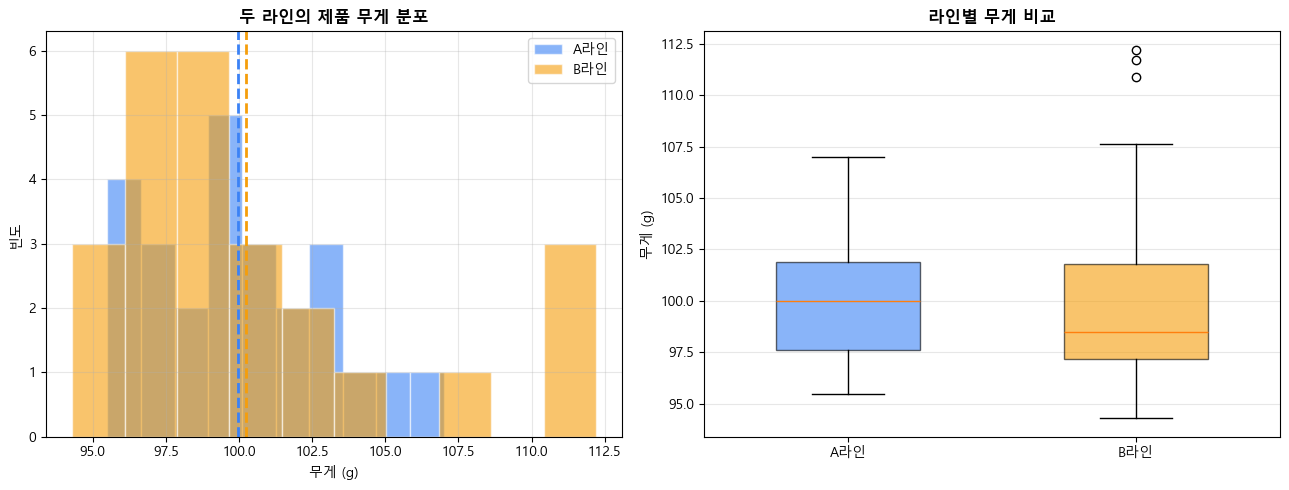

In [11]:
# 시각화: 두 라인 비교
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].hist(line_a, bins=10, alpha=0.6, color='#3B82F6', edgecolor='white', label='A라인')
axes[0].hist(line_b, bins=10, alpha=0.6, color='#F59E0B', edgecolor='white', label='B라인')
axes[0].axvline(np.mean(line_a), color='#3B82F6', linestyle='--', linewidth=2)
axes[0].axvline(np.mean(line_b), color='#F59E0B', linestyle='--', linewidth=2)
axes[0].set_xlabel('무게 (g)')
axes[0].set_ylabel('빈도')
axes[0].set_title('두 라인의 제품 무게 분포', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

bp = axes[1].boxplot([line_a, line_b], labels=['A라인', 'B라인'],
                      patch_artist=True, widths=0.5)
bp['boxes'][0].set_facecolor('#3B82F6')
bp['boxes'][0].set_alpha(0.6)
bp['boxes'][1].set_facecolor('#F59E0B')
bp['boxes'][1].set_alpha(0.6)
axes[1].set_ylabel('무게 (g)')
axes[1].set_title('라인별 무게 비교', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### 문제 2-1: 가설 설정 및 가정 검정

**(a)** 분석 목표에 맞는 **귀무가설(H₀)**과 **대립가설(H₁)**을 설정하세요.

**(b)** **양측검정** 또는 **단측검정** 중 어떤 것이 적절한지 결정하고, 그 근거를 설명하세요.

**(c)** 각 라인의 정규성을 검정하세요.

**(d)** 두 라인의 Q-Q Plot을 나란히 그리세요.

**(e)** 정규성이 충족된다면, 등분산 검정도 수행하세요.

**(f)** 가정 검정 결과를 종합하여 어떤 검정을 사용할지 결정하세요.

의사결정 과정을 단계별로 설명하세요.

In [16]:
print("\n[문제 2-1] 가설 설정 및 가정 검정")
print("-" * 40)

# TODO (a): 가설 설정
print("(a) 가설 설정: ")
print(f"    H₀: A라인과 B라인에서 생산된 과자의 무게가 동일하다.")
print(f"    H₁: A라인과 B라인에서 생산된 과자의 무게가 동일하지 않다.")

# TODO (b): 양측/단측 결정
print(f"\n(b) 검정 방향:")
print(f"    선택: 양측검정")
print(f"    근거: 단순히 동일하지 않음을 검정하는 것이기 때문이다.")

# TODO (c): 정규성 검정
# 1) Shapiro-Wilk test
stat, p = stats.shapiro(line_a)   # x: sample OR residuals OR paired differences
print("Shapiro p_a =", p)
stat, p = stats.shapiro(line_b)   # x: sample OR residuals OR paired differences
print("Shapiro p_b =", p)


[문제 2-1] 가설 설정 및 가정 검정
----------------------------------------
(a) 가설 설정: 
    H₀: A라인과 B라인에서 생산된 과자의 무게가 동일하다.
    H₁: A라인과 B라인에서 생산된 과자의 무게가 동일하지 않다.

(b) 검정 방향:
    선택: 양측검정
    근거: 단순히 동일하지 않음을 검정하는 것이기 때문이다.
Shapiro p_a = 0.44707979729857106
Shapiro p_b = 0.0009207648072219322


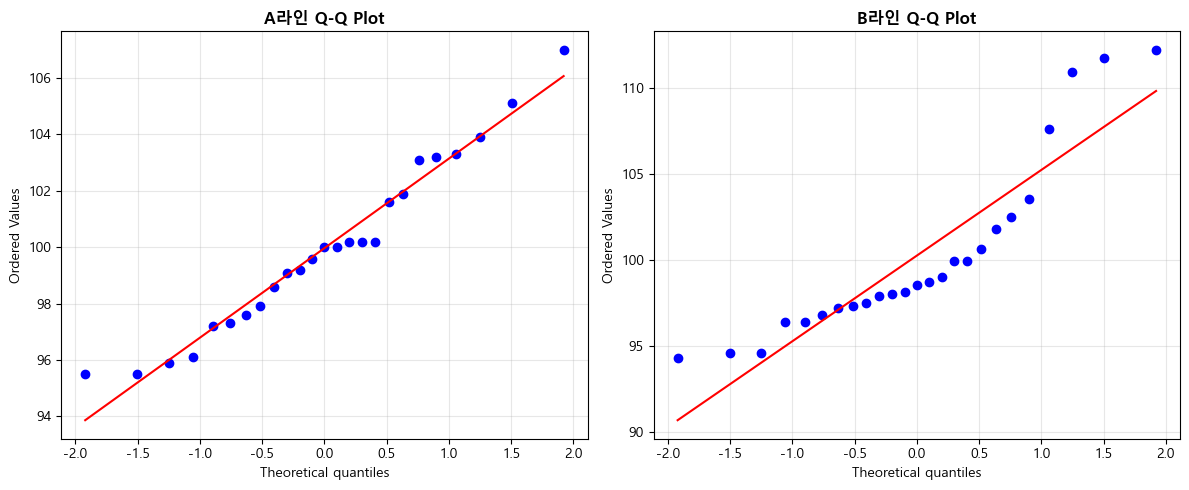

In [ ]:
# TODO (d): Q-Q Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# TODO: 각 라인의 Q-Q Plot 그리기
stats.probplot(line_a, dist="norm", plot=axes[0])
stats.probplot(line_b, dist="norm", plot=axes[1])


axes[0].set_title("A라인 Q-Q Plot", fontsize=12, fontweight="bold")
axes[0].grid(alpha=0.3)
axes[1].set_title("B라인 Q-Q Plot", fontsize=12, fontweight="bold")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("A는 정규성을 만족한다고 할 수 있지만, B는 정규성을 만족한다고 말할 수 없다.")

In [ ]:
# TODO (e): 등분산 검정 (정규성 충족 시)
lev_stat, lev_p= stats.levene(line_a, line_b)

print(f"(e) 등분산 검정:")
print(f"    F={lev_stat}, p={lev_p}")
print(f"    판정: 등분산 가정을 기각하지 못한다.")

# TODO (f): 검정 방법 결정
print(f"\n(f) 검정 방법 결정:")
print(f"   결론: 정규성을 만족하지 못하는 부분이 보이기 때문에 Mann–Whitney U 검정을 실시한다.")


(e) 등분산 검정:
    F=1.6507296774763391, p=0.20502535238595

(f) 검정 방법 결정:


### 문제 2-2: 검정 수행 및 효과크기

**(a)** 2-1에서 결정한 검정을 수행하세요 (α = 0.05).

**(b)** 적절한 효과크기를 계산하세요.

> 모수 검정(t-검정)이면 Cohen's d를, 비모수 검정이면 rank-biserial r을 계산합니다.

**(c)** p-value와 효과크기를 종합하여 최종 결론을 작성하세요.

In [23]:
alpha = 0.05 
alternative = "two-sided"  # or "less"/"greater"

u_stat, p_value = stats.mannwhitneyu(line_a, line_b, alternative=alternative)
n1, n2 = len(line_a), len(line_b)

# 효과크기: Rank-biserial correlation(RBC), Cliff's delta
rbc = 1 - (2 * u_stat) / (n1 * n2)

def cliffs_delta(x, y):
    x = np.asarray(x); y = np.asarray(y)
    gt = sum((xi > y).sum() for xi in x)
    lt = sum((xi < y).sum() for xi in x)
    return (gt - lt) / (len(x) * len(y))

delta = cliffs_delta(line_a, line_b)

print("[Mann–Whitney U 검정]")
print(f"  U = {u_stat:.4f}, p = {p_value:.4g}, alpha = {alpha} | alternative = {alternative}")
print(f"  효과크기: RBC = {rbc:.4f} | Cliff's delta = {delta:.4f} (해석 기준은 분야/측정에 따라 다름)")

if p_value < alpha:
    print("  → H0 기각: 두 집단 분포(중앙경향)가 다를 가능성이 있습니다.")
else:
    print("  → H0 기각 실패: 분포 차이에 대한 증거가 부족합니다.")

# RBC 부트스트랩 CI
B = 2000  # TODO
rng = np.random.default_rng(0)
a = np.asarray(line_a); b = np.asarray(line_b)
boot = []
for _ in range(B):
    aa = rng.choice(a, size=n1, replace=True)
    bb = rng.choice(b, size=n2, replace=True)
    u_b, _ = stats.mannwhitneyu(aa, bb, alternative=alternative)
    boot.append(1 - (2*u_b)/(n1*n2))
ci = (np.percentile(boot, 2.5), np.percentile(boot, 97.5))
print(f"  95% 부트스트랩 CI for RBC = [{ci[0]:.4f}, {ci[1]:.4f}]")

print(f"\n 0.05의 유의수준 하에서 귀무가설인 A라인과 B라인에서 생산된 과자의 무게가 동일하다를 기각할 근거가 부족하다. \n 효과크기 또한 비교적 적게 나옴을 확인할 수 있다.")

[Mann–Whitney U 검정]
  U = 347.5000, p = 0.5031, alpha = 0.05 | alternative = two-sided
  효과크기: RBC = -0.1120 | Cliff's delta = 0.1120 (해석 기준은 분야/측정에 따라 다름)
  → H0 기각 실패: 분포 차이에 대한 증거가 부족합니다.
  95% 부트스트랩 CI for RBC = [-0.4432, 0.2128]

 0.05의 유의수준 하에서 귀무가설인 A라인과 B라인에서 생산된 과자의 무게가 동일하다를 기각할 근거가 부족하다. 
 효과크기 또한 비교적 적게 나옴을 확인할 수 있다.


### 문제 2-3: 모수 vs 비모수 — 왜 가정 검정이 중요한가?

**(a)** 같은 데이터에 대해 Welch's t-검정과 Mann-Whitney U 검정을 **모두** 수행하고 결과를 비교하세요.

**(b)** 두 검정의 결론이 다르다면, 어떤 검정의 결과를 더 신뢰해야 하는지 B라인의 분포 특성과 연결하여 설명하세요.

**(c)** "표본이 크면 t-검정을 써도 괜찮다"는 주장에 대해,

이 데이터의 B라인처럼 이상치가 포함된 경우에도 성립하는지 의견을 작성하세요.

In [25]:
print("\n[문제 2-3] 모수 vs 비모수 비교")
print("-" * 40)

# TODO (a): 두 검정 비교
t_stat_comp, p_t_comp = stats.ttest_ind(line_a, line_b, equal_var=False, alternative=alternative)

u_stat_comp, p_u_comp = stats.mannwhitneyu(line_a, line_b, alternative=alternative)

print(f"(a) 검정 결과 비교:")
print(f"    Welch's t: t={t_stat_comp}, p={p_t_comp}")
print(f"    Mann-Whitney U: U={u_stat_comp}, p={p_u_comp}")

# TODO (b): 해석
print(f"\n(b) 어떤 검정을 더 신뢰해야 하나요?")
# print(f"    정규성이 만족하지 않는 상황에서는 Mann-Whitney U검정이 신뢰도가 비교적 높다.")

# TODO (c): CLT와 이상치
print(f"\n(c) 이상치가 있을 때 t-검정의 한계:")
print(f" t-검정은 평균을 기반으로 하므로 이상치에 매우 민감하다. \n 극단값이 존재하면 평균과 표준편차가 크게 왜곡되어 검정 결과가 달라질 수 있다.")
print(" 이런 경우 순위 기반의 비모수 검정이 더 안정적인 결과를 제공한다.")




[문제 2-3] 모수 vs 비모수 비교
----------------------------------------
(a) 검정 결과 비교:
    Welch's t: t=-0.22167795570919085, p=0.8257196834842396
    Mann-Whitney U: U=347.5, p=0.5031183792231538

(b) 어떤 검정을 더 신뢰해야 하나요?

(c) 이상치가 있을 때 t-검정의 한계:
 t-검정은 평균을 기반으로 하므로 이상치에 매우 민감하다. 
 극단값이 존재하면 평균과 표준편차가 크게 왜곡되어 검정 결과가 달라질 수 있다.
 이런 경우 순위 기반의 비모수 검정이 더 안정적인 결과를 제공한다.


---

## 문제 3: 요일별 고객 방문 패턴 분석

한 음식점 사장이 "요일에 따라 방문 고객 수가 다르지 않다"고 주장합니다.

한 주간 방문 고객 수를 조사하여 이 주장을 검증합니다.

총 **420명**의 고객이 방문했습니다.

**분석 목표**: 요일별 고객 방문 비율이 균등(각 1/7)한지 검정합니다.

**주어진 데이터:**

In [26]:
print("\n[문제 3] 요일별 고객 방문 패턴 분석")
print("=" * 50)

np.random.seed(503)
days = ['월', '화', '수', '목', '금', '토', '일']
true_probs = [0.10, 0.10, 0.12, 0.12, 0.16, 0.22, 0.18]
visits = np.random.choice(days, size=420, p=true_probs)
observed_visits = np.array([np.sum(visits == d) for d in days])

print(f"요일별 방문 고객 수 (총 {observed_visits.sum()}명):")
df_visits = pd.DataFrame({'요일': days, '관측 빈도': observed_visits})
display(df_visits)



[문제 3] 요일별 고객 방문 패턴 분석
요일별 방문 고객 수 (총 420명):


,요일,관측 빈도
0,월,50
1,화,43
2,수,40
3,목,54
4,금,69
5,토,89
6,일,75


### 문제 3-1: 가설 설정 및 적합도 검정

**(a)** 분석 목표에 맞는 **귀무가설(H₀)** 과 **대립가설(H₁)** 을 설정하세요.

> 카이제곱 검정은 "차이가 존재하는가?"를 판정하므로 양측/단측 개념이 적용되지 않습니다.

**(b)** 기대빈도를 계산하고, Cochran's rule을 확인하세요.

기대빈도 < 5인 셀이 전체의 20%를 초과하거나 기대빈도 < 1인 셀이 있는지 점검하세요.

**(c)** 적합도 검정을 수행하세요 (α = 0.05).

**(d)** 결론을 내리세요.

In [30]:
print("\n[문제 3-1] 가설 설정 및 적합도 검정")
print("-" * 40)

# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: 요일에 따라 방문 고객 수가 다르지 않다")
print(f"    H₁: 요일에 따라 방문 고객 수가 다르다")

# TODO (b): 기대빈도 + Cochran's rule 확인
n_total_visits = observed_visits.sum()
expected_visits = np.repeat(n_total_visits / len(days), len(days))

print(f"\n(b) 기대빈도: {expected_visits}")
# Cochran's rule 점검

# TODO (c): 적합도 검정
# ── Cochran's rule(카이제곱 근사 조건) 확인 ──
# (1) 기대빈도 < 5인 셀이 전체의 20% 이하  AND
# (2) 기대빈도 < 1인 셀이 0개
n_under1 = np.sum(expected_visits < 1)
pct_under5 = np.mean(expected_visits < 5)
cochran_ok = (n_under1 == 0) and (pct_under5 <= 0.20)

print("n_under1 =", int(n_under1))
print("pct_under5 =", float(pct_under5))
print("cochran_ok =", bool(cochran_ok))

alpha = 0.05

observed = np.asarray(observed_visits, dtype=float)
expected = np.asarray(expected_visits, dtype=float)
n = float(observed.sum())

chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)
df = int(len(observed) - 1)

print("[카이제곱 적합도 검정]")
print(f"  chi2 = {chi2:.4f}, df = {df}, p = {p:.4g}, alpha = {alpha}")

if p < alpha:
    print("  → 귀무가설 기각: 관측 분포가 기대 분포와 다르다는 증거가 있습니다.")
else:
    print("  → 귀무가설 기각 실패: 기대 분포와 다르다는 증거가 부족합니다.")
    print("  (주의) 표본이 작으면 검정력이 낮아 p가 커질 수 있습니다. 효과크기/잔차도 함께 보세요.")


# TODO (d): 결론
print(f"\n(d) 결론 (α=0.05):")
print(f"   요일에 따라 방문 고객 수는 유의하게 다르다.")



[문제 3-1] 가설 설정 및 적합도 검정
----------------------------------------
(a) 가설 설정:
    H₀: 요일에 따라 방문 고객 수가 다르지 않다
    H₁: 요일에 따라 방문 고객 수가 다르다

(b) 기대빈도: [60. 60. 60. 60. 60. 60. 60.]
n_under1 = 0
pct_under5 = 0.0
cochran_ok = True
[카이제곱 적합도 검정]
  chi2 = 32.8667, df = 6, p = 1.112e-05, alpha = 0.05
  → 귀무가설 기각: 관측 분포가 기대 분포와 다르다는 증거가 있습니다.

(d) 결론 (α=0.05):
   요일에 따라 방문 고객 수는 유의하게 다르다.


### 문제 3-2: 효과크기와 사후분석 (잔차 분석)

**(a)** 효과크기(Cohen's w)를 계산하고 해석하세요.

**(b)** 표준화 잔차를 계산하세요.

**각 요일**에 대해 잔차 값과 방향(기대보다 많음/적음)을 보고하세요.

> 표준화 잔차 = (O − E) / √E

**(c)** |잔차| > 2인 요일을 찾고, 이 요일들이 왜 기대와 다른지 실생활 관점에서 해석하세요.

**(d)** 관측 빈도와 기대 빈도를 비교하는 막대 그래프를 그리세요.

In [ ]:
print("\n[문제 3-2] 효과크기와 사후분석")
print("-" * 40)

# 효과크기: Cohen's w
w = float(np.sqrt(chi2 / n)) if n > 0 else float("nan")
print(f"  효과크기 Cohen's w = {w:.4f}")
print("    (참고 기준) w≈0.10(작음), 0.30(중간), 0.50(큼 — 맥락 의존)")

# 사후분석: 표준화 잔차
std_residuals = (observed - expected) / np.sqrt(expected)
print("[사후분석] 표준화 잔차 (|z|>2이면 기대와 다른 범주일 수 있음)")
for i, z in enumerate(std_residuals):
    flag = " |z|>2" if np.isfinite(z) and abs(z) > 2 else ""
    print(f"  category[{i}] z = {float(z):.3f}{flag}")

# TODO (c): 해석
print(f"\n(c) |잔차| > 2인 요일 해석:")
print("    화요일과 수요일은 기대빈도보다 방문 고객 수가 유의하게 적다.")
print("    토요일은 기대빈도보다 방문 고객 수가 유의하게 많다.")
print("    이는 고객 방문이 주말, 특히 토요일에 집중되는 경향이 있음을 시사한다.")



[문제 3-2] 효과크기와 사후분석
----------------------------------------
  효과크기 Cohen's w = 0.2797
    (참고 기준) w≈0.10(작음), 0.30(중간), 0.50(큼 — 맥락 의존)
[사후분석] 표준화 잔차 (|z|>2이면 기대와 다른 범주일 수 있음)
  category[0] z = -1.291
  category[1] z = -2.195 |z|>2
  category[2] z = -2.582 |z|>2
  category[3] z = -0.775
  category[4] z = 1.162
  category[5] z = 3.744 |z|>2
  category[6] z = 1.936

(c) |잔차| > 2인 요일 해석:


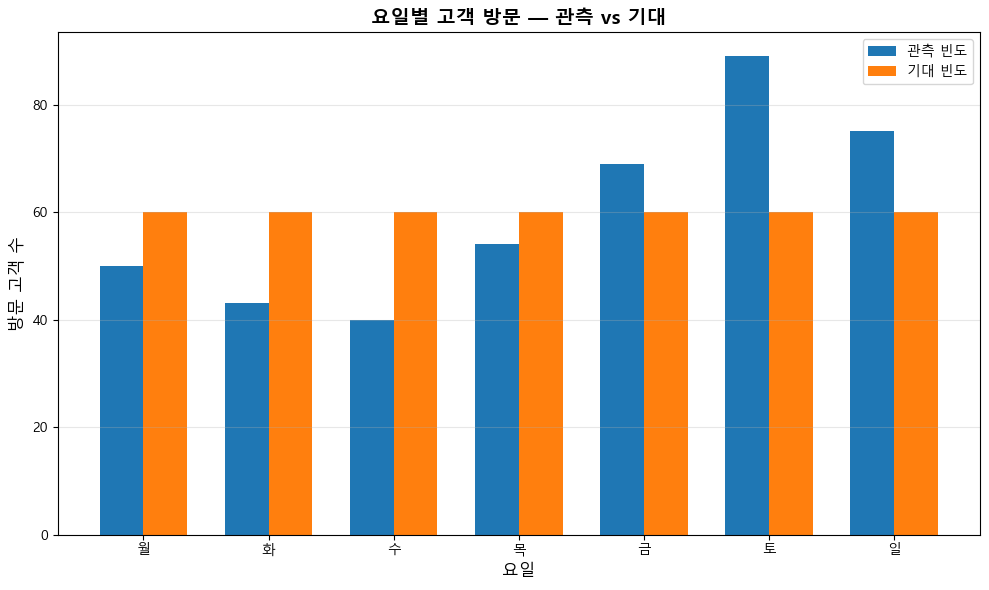

In [35]:
# TODO (d): 관측 vs 기대 빈도 막대 그래프
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(days))
width = 0.35
ax.bar(x - width/2, observed_visits, width, label='관측 빈도')
ax.bar(x + width/2, expected_visits, width, label='기대 빈도')

ax.set_xlabel('요일', fontsize=12)
ax.set_ylabel('방문 고객 수', fontsize=12)
ax.set_title('요일별 고객 방문 — 관측 vs 기대', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(days)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### 문제 3-3: 소규모 카페 음료 선호도

위와 별개 상황입니다. 한 소규모 카페에서 5가지 음료의 선호도가 균등한지 조사했습니다.

총 **22명**의 고객이 응답했습니다.

**분석 목표**: 5가지 음료의 선호도가 균등(각 1/5)한지 검정합니다.

**주어진 데이터:**

In [36]:
print("\n[문제 3-3] 소규모 카페 음료 선호도")
print("-" * 40)

menu = ['아메리카노', '라떼', '카푸치노', '스무디', '에이드']
observed_small = np.array([8, 5, 4, 3, 2])
n_total_small = observed_small.sum()

print(f"음료별 선호 고객 수 (총 {n_total_small}명):")
df_small = pd.DataFrame({'음료': menu, '관측 빈도': observed_small})
display(df_small)



[문제 3-3] 소규모 카페 음료 선호도
----------------------------------------
음료별 선호 고객 수 (총 22명):


,음료,관측 빈도
0,아메리카노,8
1,라떼,5
2,카푸치노,4
3,스무디,3
4,에이드,2


**(a)** 가설을 설정하세요.

**(b)** 균등 분포를 가정할 때 기대빈도를 계산하고, Cochran's rule을 점검하세요. 조건이 충족되나요?

**(c)** Cochran's rule이 위반되면, 사용할 수 있는 대안 방법은 무엇인가요?
  - 범주 병합과 Monte Carlo 시뮬레이션 중 어떤 것이 이 상황에 더 적절한지 설명하세요.

**(d)** 선택한 대안 방법을 적용하여 검정을 수행하세요.

**(e)** 효과크기(Cohen's w)를 계산하고 해석하세요.

In [ ]:
# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: 한 소규모 카페에서 5가지 음료의 선호도가 균등하다")
print(f"    H₁: 한 소규모 카페에서 5가지 음료의 선호도가 균등하지 않다")

# TODO (b): 기대빈도 + Cochran's rule
expected_small = np.repeat(n_total_small / len(menu), len(menu))

print(f"\n(b) 기대빈도: {expected_small}")
# ── Cochran's rule(카이제곱 근사 조건) 확인 ──
# (1) 기대빈도 < 5인 셀이 전체의 20% 이하  AND
# (2) 기대빈도 < 1인 셀이 0개
n_under1 = np.sum(expected_small < 1)
pct_under5 = np.mean(expected_small < 5)
cochran_ok = (n_under1 == 0) and (pct_under5 <= 0.20)

print("n_under1 =", int(n_under1))
print("pct_under5 =", float(pct_under5))
print("cochran_ok =", bool(cochran_ok))

# TODO (c): 대안 방법 선택
print(f"\n(c) 대안 방법:")
print(f"   Monte Carlo 시뮬레이션")

# TODO (d): 검정 수행 (선택한 대안)
alpha = 0.05 
observed = observed_small
expected = expected_small
obs = np.asarray(observed, dtype=float)

# If expected is probabilities, convert to counts
exp = np.asarray(expected, dtype=float)
if np.isclose(exp.sum(), 1.0):
    exp = exp * obs.sum()

chi2_obs = ((obs - exp) ** 2 / exp).sum()
df = len(obs) - 1

# Monte Carlo under H0: sample from multinomial with expected probs
p_exp = exp / exp.sum()
rng = np.random.default_rng(0)
n_sim = 100_000  # TODO
count_extreme = 0
n = int(obs.sum())

for _ in range(n_sim):
    sim = rng.multinomial(n, p_exp).astype(float)
    chi2_s = ((sim - exp) ** 2 / exp).sum()
    count_extreme += (chi2_s >= chi2_obs)

p_mc = count_extreme / n_sim

print(f"[Chi-square 적합도] (Monte Carlo) chi2 = {chi2_obs:.4g}, df = {df}, p_mc = {p_mc:.4g}, alpha = {alpha}")

if p_mc < alpha:
    print("→ 결론: 귀무가설 기각 (분포가 기대와 다를 가능성이 큼)")
else:
    print("→ 결론: 귀무가설 기각 실패 (기대분포와의 차이에 대한 증거 부족)")

# Effect size: Cohen's w
w = np.sqrt(chi2_obs / n) if n > 0 else np.nan
print(f"[효과크기] Cohen's w = {w:.4f}  (참고: 0.1 작음, 0.3 중간, 0.5 큼)")

# Residuals
with np.errstate(divide='ignore', invalid='ignore'):
    resid = (obs - exp) / np.sqrt(exp)
print("[해석 팁] |잔차|가 큰 범주가 차이를 주도할 수 있습니다.")

print(f"\n(e) Cohen's w = {w}")
print(f"    해석: Cohen's w ≈ 0.47로 중간에서 큰 효과 크기에 해당한다.")
print(f"         통계적으로는 유의하지 않았으나, 실제 분포 차이는 비교적 큰 편이다.")
print(f"         이는 표본 수가 적어 검정력이 부족했을 가능성을 말한다.")



(a) 가설 설정:
    H₀: 한 소규모 카페에서 5가지 음료의 선호도가 균등하다
    H₁: 한 소규모 카페에서 5가지 음료의 선호도가 균등하지 않다

(b) 기대빈도: [4.4 4.4 4.4 4.4 4.4]
n_under1 = 0
pct_under5 = 1.0
cochran_ok = False

(c) 대안 방법:
   Monte Carlo 시뮬레이션
[Chi-square 적합도] (Monte Carlo) chi2 = 4.818, df = 4, p_mc = 0.3378, alpha = 0.05
→ 결론: 귀무가설 기각 실패 (기대분포와의 차이에 대한 증거 부족)
[효과크기] Cohen's w = 0.4680  (참고: 0.1 작음, 0.3 중간, 0.5 큼)
[해석 팁] |잔차|가 큰 범주가 차이를 주도할 수 있습니다.

(e) Cohen's w = 0.4679831882266818
    해석: Cohen's w ≈ 0.47로 중간에서 큰 효과 크기에 해당한다.
         통계적으로는 유의하지 않았으나, 실제 분포 차이는 비교적 큰 편이다.
         이는 표본 수가 적어 검정력이 부족했을 가능성을 시사한다.


---

## 문제 4: 연령대별 운동 선호도 조사

헬스장에서 연령대(20대/30대/40대)에 따라 선호하는 운동 종류(헬스/요가/수영)가 다른지 조사합니다.

총 **180명**을 대상으로 설문을 실시했습니다.

**분석 목표**: 연령대에 따라 선호하는 운동 종류에 유의한 차이가 있는지 검정합니다.

**주어진 데이터:**

In [70]:
print("\n[문제 4] 연령대별 운동 선호도 조사")
print("=" * 50)

np.random.seed(504)
n_survey = 180

ages = np.random.choice(['20대', '30대', '40대'], size=n_survey, p=[0.35, 0.35, 0.30])

exercise_prefs = []
for age in ages:
    if age == '20대':
        exercise_prefs.append(np.random.choice(['헬스', '요가', '수영'], p=[0.50, 0.20, 0.30]))
    elif age == '30대':
        exercise_prefs.append(np.random.choice(['헬스', '요가', '수영'], p=[0.30, 0.40, 0.30]))
    else:
        exercise_prefs.append(np.random.choice(['헬스', '요가', '수영'], p=[0.20, 0.35, 0.45]))
exercise_prefs = np.array(exercise_prefs)

df_survey = pd.DataFrame({'연령대': ages, '운동': exercise_prefs})

ct_raw_ex = pd.crosstab(df_survey['연령대'], df_survey['운동'])
ct_exercise = pd.crosstab(df_survey['연령대'], df_survey['운동'],
                            margins=True, margins_name='합계')
print("\n교차표:")
display(ct_exercise)



[문제 4] 연령대별 운동 선호도 조사

교차표:


운동,수영,요가,헬스,합계
연령대,,,,
20대,18,19,29,66
30대,19,22,19,60
40대,29,16,9,54
합계,66,57,57,180


### 문제 4-1: 가설 설정 및 독립성 검정

**(a)** 분석 목표에 맞는 **귀무가설(H₀)** 과 **대립가설(H₁)** 을 설정하세요.

**(b)** 기대빈도를 계산하고 표로 출력하세요.

  - Cochran's rule(기대빈도 < 5인 셀이 20% 이하, 기대빈도 < 1인 셀이 0개)을 점검하세요.

**(c)** 조건 충족 여부에 따라 적절한 검정을 수행하세요 (α = 0.05).

**(d)** 결론을 내리세요.

In [75]:
print("\n[문제 4-1] 가설 설정 및 독립성 검정")
print("-" * 40)

ct_raw_ex = pd.crosstab(df_survey['연령대'], df_survey['운동'])

# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: 연령대와 운동 선호는 서로 독립이다.")
print(f"    H₁: 연령대와 운동 선호는 서로 독립이 아니다.")

# Cochran's rule 점검
# table : 분할표(관측도수) array (R×C)
# table = np.array([[...], [...], ...])

table_np: np.ndarray = np.asarray(ct_raw_ex, dtype=float)
chi2, p, dof, expected_raw = stats.chi2_contingency(table_np, correction=False)
expected: np.ndarray = np.asarray(expected_raw, dtype=float)

# ── Cochran's rule(카이제곱 근사 조건) 확인 ──
n_under1 = np.sum(expected < 1)
pct_under5 = np.mean(expected < 5)
cochran_ok = (n_under1 == 0) and (pct_under5 <= 0.20)

print("shape =", table_np.shape)
print("n_under1 =", int(n_under1))
print("pct_under5 =", float(pct_under5))
print("cochran_ok =", bool(cochran_ok))

# TODO (c): 검정 수행
# table : 분할표(관측도수) array (R×C)
# table = np.array([[...], [...], ...], dtype=int)

table_np = np.asarray(ct_raw_ex, dtype=float)

chi2, p, dof, expected_raw = stats.chi2_contingency(table_np, correction=False)
expected = np.asarray(expected_raw, dtype=float)

print("[카이제곱 독립성 검정]")
print(f"  chi2 = {chi2:.4f}, dof = {dof}, p = {p:.4g}, alpha = {alpha}")
alpha = 0.05
if p < alpha:
    print("  → 귀무가설 기각: 두 범주형 변수는 독립이 아닐 가능성이 있습니다(연관성 존재).")
else:
    print("  → 귀무가설 기각 실패: 연관성에 대한 통계적 증거가 부족합니다.")
    print("  (주의) 표본이 작으면 검정력이 낮아 p가 커질 수 있으니, 효과크기도 함께 보세요.")

# 효과크기: Cramer's V
n = float(table_np.sum())
r, c = table_np.shape
k = min(r - 1, c - 1)
cramers_v = float(np.sqrt(chi2 / (n * k))) if (n > 0 and k > 0) else float("nan")
print(f"  효과크기 Cramer's V = {cramers_v:.4f}")


# TODO (d): 결론
print(f"\n(d) 결론 (α=0.05):")
print(f"   0.05 유의수준에서 귀무가설 기각 → 연령대와 운동 선호는 유의하게 관련이 있다. \n   다만, 효과크기는 적게 나온다.")



[문제 4-1] 가설 설정 및 독립성 검정
----------------------------------------
(a) 가설 설정:
    H₀: 연령대와 운동 선호는 서로 독립이다.
    H₁: 연령대와 운동 선호는 서로 독립이 아니다.
shape = (3, 3)
n_under1 = 0
pct_under5 = 0.0
cochran_ok = True
[카이제곱 독립성 검정]
  chi2 = 13.9655, dof = 4, p = 0.007406, alpha = 0.05
  → 귀무가설 기각: 두 범주형 변수는 독립이 아닐 가능성이 있습니다(연관성 존재).
  효과크기 Cramer's V = 0.1970

(d) 결론 (α=0.05):
   0.05 유의수준에서 귀무가설 기각 → 연령대와 운동 선호는 유의하게 관련이 있다. 
   다만, 효과크기는 적게 나온다.


### 문제 4-2: 효과크기와 사후분석 (조정된 잔차)

**(a)** Cramér's V를 계산하고 해석하세요.

df* = min(r−1, c−1)에 따른 해석 기준을 적용하세요.

**(b)** 조정된 잔차(표준화 잔차)를 구하고 표로 출력하세요.

**(c)** 각 셀이 의미하는 바를 구체적으로 해석하세요.
> 예: "20대 × 헬스: 잔차 = +2.5 → 20대는 기대보다 헬스를 더 많이 선호합니다"

**(d)** 관측 빈도와 기대 빈도를 비교하는 히트맵을 나란히 그리세요.

In [74]:
print("\n[문제 4-2] 효과크기와 사후분석")
print("-" * 40)

# 효과크기: Cramer's V
n = float(table_np.sum())
r, c = table_np.shape
k = min(r - 1, c - 1)
cramers_v = float(np.sqrt(chi2 / (n * k))) if (n > 0 and k > 0) else float("nan")
print(f"  효과크기 Cramer's V = {cramers_v:.4f}")

# TODO (b): 조정된 잔차
# |잔차|가 큰 셀이 '어떤 방향으로' 기여했는지 힌트를 줍니다.
row_sum = table_np.sum(axis=1, keepdims=True)
col_sum = table_np.sum(axis=0, keepdims=True)
row_prop = row_sum / n if n > 0 else np.zeros_like(row_sum)
col_prop = col_sum / n if n > 0 else np.zeros_like(col_sum)

den = np.sqrt(expected * (1.0 - row_prop) * (1.0 - col_prop))
with np.errstate(divide="ignore", invalid="ignore"):
    resid = (table_np - expected) / den

table_df = ct_raw_ex if hasattr(ct_raw_ex, "index") else pd.DataFrame(table_np)

rows = []
for i, row_label in enumerate(table_df.index):
    for j, col_label in enumerate(table_df.columns):
        z = resid[i, j]
        obs_ij = float(table_np[i, j])
        exp_ij = float(expected[i, j])
        if obs_ij > exp_ij:
            direction = "관측>기대"
        elif obs_ij < exp_ij:
            direction = "관측<기대"
        else:
            direction = "관측=기대"

        rows.append({
            "행(Row)": row_label,
            "열(Col)": col_label,
            "관측(Obs)": int(obs_ij),
            "기대(Exp)": exp_ij,
            "조정잔차(AdjResid)": float(z) if np.isfinite(z) else float("nan"),
            "Flag(|z|>2)": bool(np.isfinite(z) and abs(z) > 2),
            "방향": direction
        })

out = pd.DataFrame(rows)
out_sorted = out.sort_values("조정잔차(AdjResid)", key=lambda s: s.abs(), ascending=False)

print("[사후분석] 조정 표준화 잔차 요약 (|z| 큰 순 상위 10개)")
print(out_sorted.head(10).to_string(index=False))

sig = out_sorted[out_sorted["Flag(|z|>2)"]]
print("[사후분석] |z| > 2 인 셀 (유의 가능)")
if sig.empty:
    print("(없음)")
else:
    print(sig.to_string(index=False))

if sig.empty:
    print("해석: |z|>2인 셀이 없어 특정 조합이 유의하게 기여한다고 단정하기 어렵다.")
else:
    top_cells = ", ".join([f"{r['행(Row)']}-{r['열(Col)']}" for _, r in sig.iterrows()])
    print(f"해석: |z|>2인 셀({top_cells})이(가) 독립성 위반(연관성)에 주로 기여한다.")



[문제 4-2] 효과크기와 사후분석
----------------------------------------
  효과크기 Cramer's V = 0.1970
[사후분석] 조정 표준화 잔차 요약 (|z| 큰 순 상위 10개)
행(Row) 열(Col)  관측(Obs)  기대(Exp)  조정잔차(AdjResid)  Flag(|z|>2)    방향
   40대     수영       29     19.8        3.105203         True 관측>기대
   40대     헬스        9     17.1       -2.832185         True 관측<기대
   20대     헬스       29     20.9        2.693267         True 관측>기대
   20대     수영       18     24.2       -1.989994        False 관측<기대
   30대     요가       22     19.0        1.019703        False 관측>기대
   30대     수영       19     22.0       -0.984327        False 관측<기대
   20대     요가       19     20.9       -0.631754        False 관측<기대
   40대     요가       16     17.1       -0.384618        False 관측<기대
   30대     헬스       19     19.0        0.000000        False 관측=기대
[사후분석] |z| > 2 인 셀 (유의 가능)
행(Row) 열(Col)  관측(Obs)  기대(Exp)  조정잔차(AdjResid)  Flag(|z|>2)    방향
   40대     수영       29     19.8        3.105203         True 관측>기대
   40대     헬스        9     17.1       -2.83

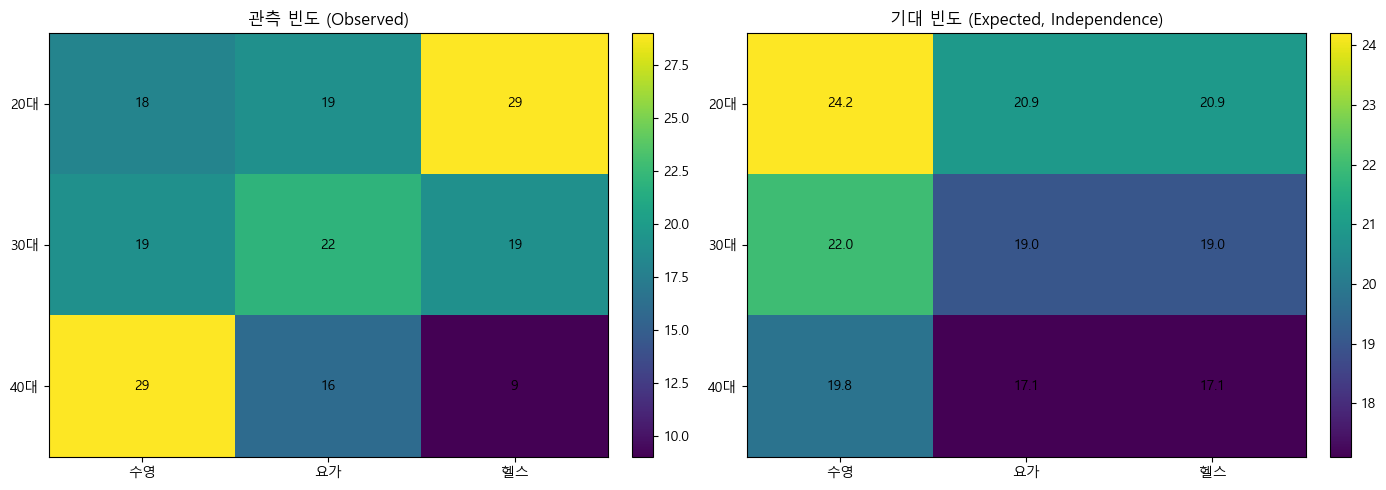

In [59]:
# TODO (d): 히트맵 시각화 (관측 빈도 vs 기대 빈도)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# TODO: 관측 빈도 히트맵
obs_df = ct_exercise.iloc[:-1, :-1]
table_np = obs_df.values

im0 = axes[0].imshow(table_np, aspect='auto')
axes[0].set_title("관측 빈도 (Observed)")
axes[0].set_xticks(np.arange(obs_df.shape[1]))
axes[0].set_xticklabels(obs_df.columns)
axes[0].set_yticks(np.arange(obs_df.shape[0]))
axes[0].set_yticklabels(obs_df.index)

for i in range(table_np.shape[0]):
    for j in range(table_np.shape[1]):
        axes[0].text(j, i, f"{table_np[i, j]}", ha='center', va='center')

fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

# TODO: 기대 빈도 히트맵
chi2, p, dof, expected = stats.chi2_contingency(table_np, correction=False)

im1 = axes[1].imshow(expected, aspect='auto')
axes[1].set_title("기대 빈도 (Expected, Independence)")
axes[1].set_xticks(np.arange(obs_df.shape[1]))
axes[1].set_xticklabels(obs_df.columns)
axes[1].set_yticks(np.arange(obs_df.shape[0]))
axes[1].set_yticklabels(obs_df.index)

for i in range(expected.shape[0]):
    for j in range(expected.shape[1]):
        axes[1].text(j, i, f"{expected[i, j]:.1f}", ha='center', va='center')

fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

### 문제 4-3: 면접 방식별 합격률

위 데이터와 별개로, 한 중소기업 인사팀에서 **면접 방식**(대면/화상)에 따라

최종 합격률이 다른지 파악하려 합니다.

소규모 채용 회차로 총 **20명**의 지원자 데이터입니다.

**분석 목표**: 면접 방식(대면/화상)에 따라 최종 합격률에 유의한 차이가 있는지 검정합니다.

**주어진 데이터:**

In [61]:
print("\n[문제 4-3] 면접 방식별 합격률")
print("-" * 40)

# 2×2 교차표
#              합격    불합격
# 대면 면접     7       3      = 10
# 화상 면접     2       8      = 10
#               9      11      = 20
data_fisher_q4 = np.array([[7, 3],
                             [2, 8]])

ct_fisher_q4 = pd.DataFrame(data_fisher_q4,
                              index=['대면 면접', '화상 면접'],
                              columns=['합격', '불합격'])
ct_display_q4 = ct_fisher_q4.copy()
ct_display_q4['합계'] = ct_display_q4.sum(axis=1)
ct_display_q4.loc['합계'] = ct_display_q4.sum()
print("교차표:")
display(ct_display_q4)



[문제 4-3] 면접 방식별 합격률
----------------------------------------
교차표:


,합격,불합격,합계
대면 면접,7,3,10
화상 면접,2,8,10
합계,9,11,20


**(a)** **귀무가설(H₀)** 과 **대립가설(H₁)** 을 설정하세요.

**(b)** **양측검정** 또는 **단측검정** 중 어떤 것이 적절한지 결정하고, 그 근거를 설명하세요.

> Fisher 정확검정에서는 양측/단측 선택이 결과에 직접 영향을 줍니다.

**(c)** 기대빈도를 계산하고 Cochran's rule을 점검하세요.

카이제곱 검정을 적용할 수 있는지 판단하세요.

**(d)** 적절한 검정을 선택하여 수행하세요 (α = 0.05).

왜 이 검정을 선택했는지 이유를 설명하세요.

**(e)** 오즈비(OR)를 구하고 해석하세요.

> 오즈(Odds) = 해당 사건 / 반대 사건 \
> 오즈비(OR) = 한 집단의 오즈 / 다른 집단의 오즈 \
> 예: 대면 면접의 합격 오즈 = 합격 / 불합격

**(f)** 효과크기 φ(Phi) 계수를 계산하고 해석하세요.

In [68]:
# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: 면접 방식(대면/화상)에 따라 최종 합격률은 동일하다.")
print(f"    H₁: 면접 방식(대면/화상)에 따라 최종 합격률은 동일하지 않다.")

# TODO (b): 양측/단측 결정
print(f"\n(b) 검정 방향:")
# print(f"    선택: 양측검정")
# print(f"    근거: 단순히 다른지를 검정하는 것이기 때문이다.")

# TODO (c): 기대빈도 + Cochran's rule
table_np: np.ndarray = np.asarray(ct_fisher_q4, dtype=float)
chi2, p, dof, expected_raw = stats.chi2_contingency(table_np, correction=False)
expected: np.ndarray = np.asarray(expected_raw, dtype=float)

# ── Cochran's rule(카이제곱 근사 조건) 확인 ──
n_under1 = np.sum(expected < 1)
pct_under5 = np.mean(expected < 5)
cochran_ok = (n_under1 == 0) and (pct_under5 <= 0.20)

print("shape =", table_np.shape)
print("n_under1 =", int(n_under1))
print("pct_under5 =", float(pct_under5))
print("cochran_ok =", bool(cochran_ok))

print(f"    Fisher의 정확검정을 수행한다.")

# TODO (d): 검정 수행
alpha = 0.05
alternative = "two-sided"

# 2×2 분할표
# table = np.array([[a, b],
#                   [c, d]], dtype=int)
table = np.asarray(ct_fisher_q4, dtype=float)
oddsratio, p_value = stats.fisher_exact(table, alternative=alternative)

print(f"[Fisher exact (2×2)] OR = {oddsratio:.4g}, p = {p_value:.4g}, alpha = {alpha}")

if p_value < alpha:
    print("→ 결론: 귀무가설 기각 (독립이 아닐 가능성이 큼)")
else:
    print("→ 결론: 귀무가설 기각 실패 (연관성 증거 부족)")


# TODO (e): 오즈비 해석
print(f"\n(e) 오즈비:")
print(f"    OR = {oddsratio:.4f}")

if oddsratio > 1:
    print("    대면 면접의 합격 오즈가 화상 면접보다 높다.")
elif oddsratio < 1:
    print("    대면 면접의 합격 오즈가 화상 면접보다 낮다.")
else:
    print("    두 면접 방식의 합격 오즈는 동일하다.")


# TODO (f): Phi 계수
n_total = table_np.sum()
phi_q4 = np.sqrt(chi2 / n_total)

print(f"\n(f) Phi 계수(φ) = {phi_q4:.4f}")

if abs(phi_q4) < 0.1:
    print("    해석: 매우 작은 효과를 가지고 있다.")
elif abs(phi_q4) < 0.3:
    print("    해석: 작은 효과를 가지고 있다.")
elif abs(phi_q4) < 0.5:
    print("    해석: 중간 효과를 가지고 있다.")
else:
    print("    해석: 큰 효과를 가지고 있다.")


(a) 가설 설정:
    H₀: 면접 방식(대면/화상)에 따라 최종 합격률은 동일하다.
    H₁: 면접 방식(대면/화상)에 따라 최종 합격률은 동일하지 않다.

(b) 검정 방향:
shape = (2, 2)
n_under1 = 0
pct_under5 = 0.5
cochran_ok = False
    Fisher의 정확검정을 수행한다.
[Fisher exact (2×2)] OR = 9.333, p = 0.06978, alpha = 0.05
→ 결론: 귀무가설 기각 실패 (연관성 증거 부족)

(e) 오즈비:
    OR = 9.3333
    대면 면접의 합격 오즈가 화상 면접보다 높다.

(f) Phi 계수(φ) = 0.5025
    해석: 큰 효과를 가지고 있다.
